In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
import joblib
import numpy as np
import warnings
from sklearn.metrics import accuracy_score

In [12]:
dataset_path = 'C:\\Users\\user\\Desktop\\Repositories\\Django\\Machine_Learning\\Symptoms_dataset.csv'
df = pd.read_csv(dataset_path)
X = df.iloc[:, 1:]  # Symptoms columns
y = df['Disease']
print(df.shape[0])
    

5175


In [4]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
shuffled_X, shuffled_y = shuffle(X, y, random_state=42)

In [6]:
train_X, test_X, train_y, test_y = train_test_split(
        shuffled_X, shuffled_y, test_size=0.2, random_state=42
    )
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names, but MLPClassifier was fitted with feature names")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [8]:
model = MLPClassifier(hidden_layer_sizes=(225,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42)

In [9]:
model_filename = 'disease_prediction_model.joblib'
joblib.dump(model, model_filename)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8193236714975846


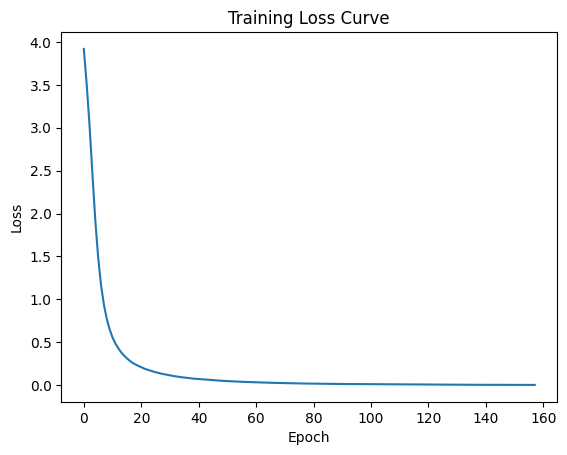

In [10]:
import matplotlib.pyplot as plt

# Train the model
# Visualize training loss
plt.plot(model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a range of random state values
random_state_values = range(30, 50)

# Initialize lists to store performance metric values
accuracy_scores = []

# Load your dataset and define X, y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the model for each random state value
for random_state in random_state_values:
    # Initialize MLPClassifier with the desired hyperparameters
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=random_state)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and store the result
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


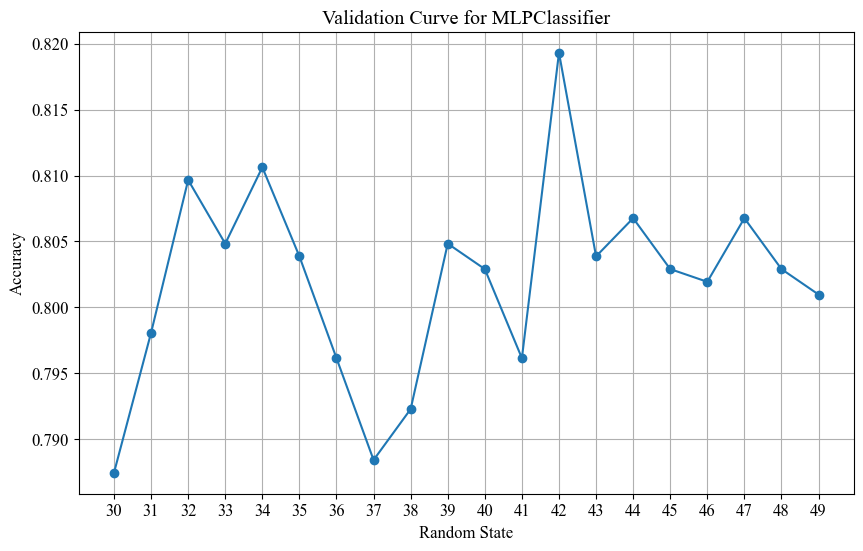

In [9]:

from matplotlib import rcParams

rcParams['font.family'] = 'times new roman'
rcParams['font.size'] = 12


# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(random_state_values, accuracy_scores, marker='o')
plt.title('Validation Curve for MLPClassifier')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.xticks(random_state_values)
plt.grid(True)

# Save the figure as SVG with Times New Roman font
plt.savefig('validation_curve.svg', format='svg', bbox_inches='tight')
plt.show()


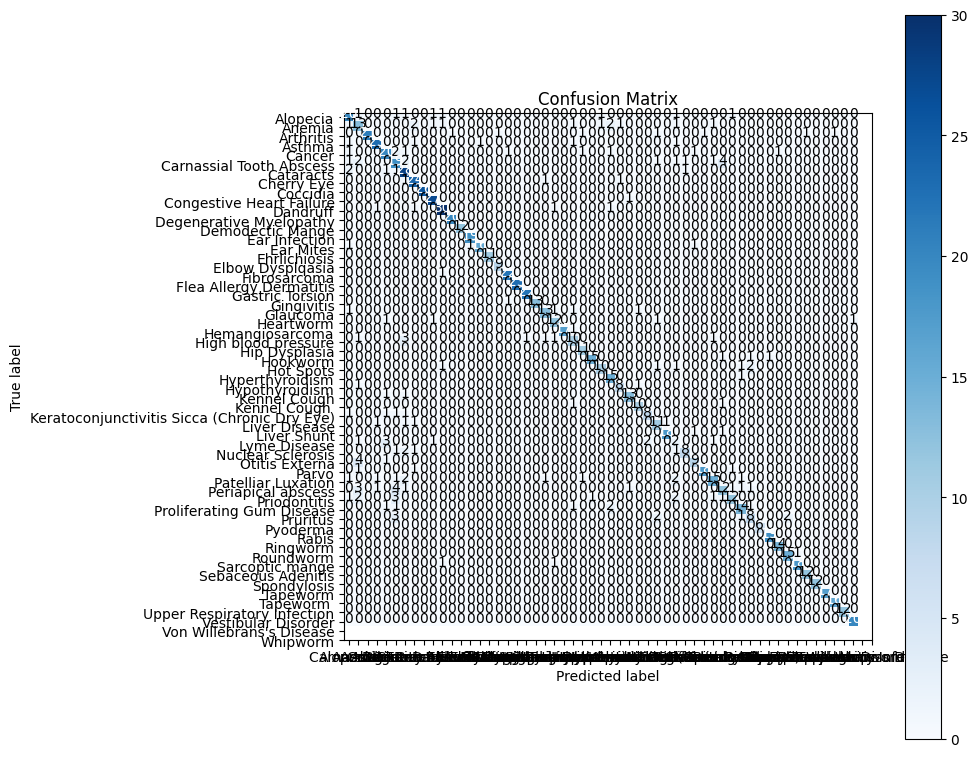

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

# Load your dataset and define X, y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLPClassifier with the desired hyperparameters
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Labels for the matrix
classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Display the number of samples in each cell
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [9]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset and define X, y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLPClassifier with the desired hyperparameters
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)



Accuracy: 0.8193236714975846
Precision: 0.8254595364357321
Recall: 0.8193236714975846
F1-score: 0.818596804538773


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


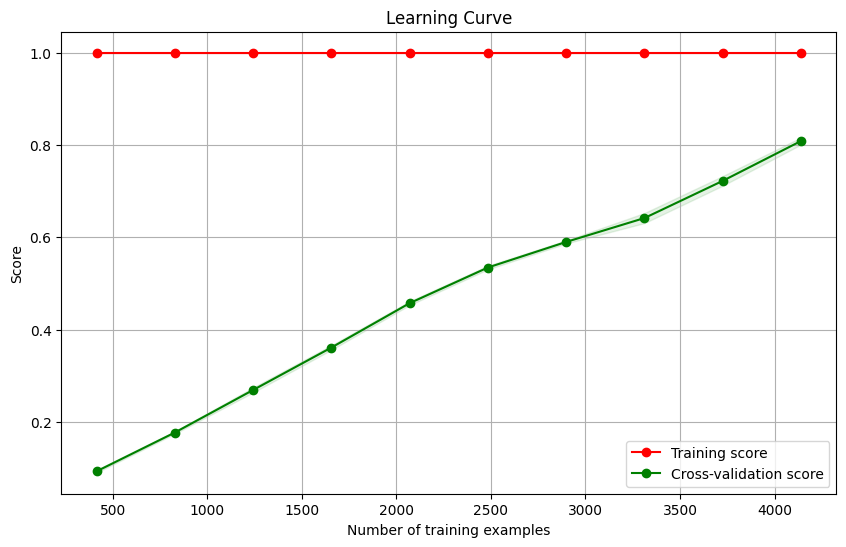

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier

# Initialize your model with desired hyperparameters
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Define the sizes of training data to use for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # Use 10 different training set sizes from 10% to 100%

# Generate learning curve data
train_sizes_abs, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)




AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

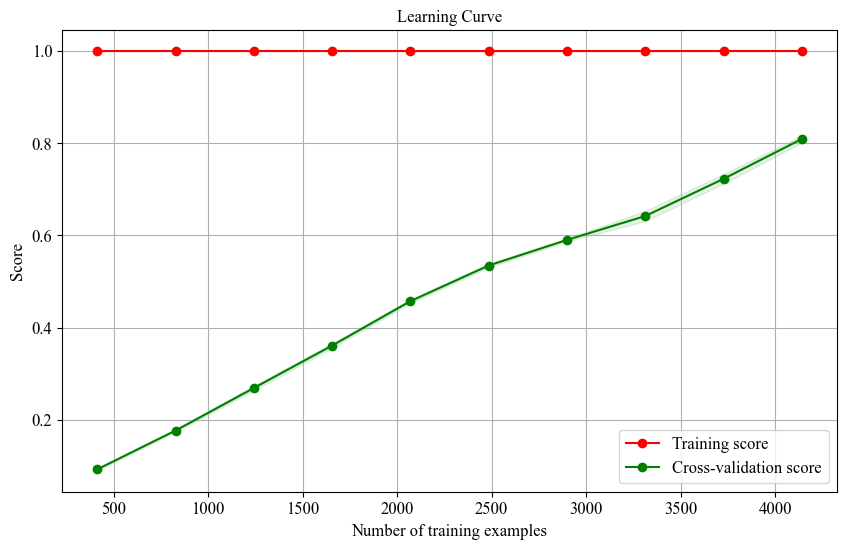

In [24]:
# Set font properties
plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['font.size'] = 12

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.title("Learning Curve", fontdict={'family': 'Times New Roman', 'size': 12})
plt.xlabel("Number of training examples", fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel("Score", fontdict={'family': 'Times New Roman', 'size': 12})
plt.legend(loc="best", prop={'family': 'Times New Roman', 'size': 12})
plt.grid()

plt.savefig('learning_curve_MLP_FINAL.svg', format='svg')
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

# Define the range of values for the hyperparameter (e.g., number of hidden units)
param_range = [50, 100, 150, 200, 250]

# Initialize MLPClassifier
model = MLPClassifier(max_iter=1000, random_state=42)

# Generate validation curve
train_scores, valid_scores = validation_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    param_name='hidden_layer_sizes',  # Hyperparameter to vary
    param_range=param_range,
    scoring='accuracy',  # Use appropriate scoring metric
    cv=5  # Cross-validation folds
)

# Calculate mean and standard deviation of scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)




c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [18]:

# Plot validation curve

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12


plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(param_range, valid_mean, label='Validation score', color='red')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend(loc='best')

# Save the plot as an SVG file
plt.savefig('validation_curve.svg', format='svg')

# Show the plot
plt.show()


NameError: name 'param_range' is not defined

<Figure size 1000x600 with 0 Axes>